In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
A   = float(input('Введите амплитуду сигнала, ед.: '))
f0  = float(input('Введите частоту сигнала, Гц: '))

Введите амплитуду сигнала, ед.: 1
Введите частоту сигнала, Гц: 1


In [15]:

fdn = 2*f0       # Частота дискретизации
                  # в соответствии с критерием Найквиста
mvis= 4
fdv = mvis*fdn   # Частота дискретизации для визуализации
dt  = 1/fdv      # Интервал дискретизации по времени

T   = 1/f0       # Период сигнала
NT  = 6

t   = np.arange(0, NT*T, dt)  # Вектор времени, с
y   = A*np.sin(2*np.pi*f0*t)
                  # Вектор сигнала
N   = len(y)
                  
# Дискретное преобразование Фурье
k   = np.arange(N)
Ex  = np.exp(np.complex(0,-1)*2*np.pi/N*np.dot(np.transpose(k),k))
Y   = y*Ex

# Обратное дискретное преобразование Фурье
Ex  = np.exp(np.complex(0,1)*2*np.pi/N*np.dot(np.transpose(k),k))
ys  = Y/(N-1)*Ex

Y2  = Y*np.conj(Y)  # Квадрат модуля Фурье-образа
ff  = k*fdv/N # Вектор частоты, Гц

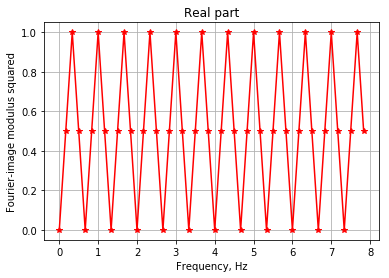

In [18]:
plt.plot(ff,np.real(Y2),'r-*')
plt.title("Real part")
plt.xlabel('Frequency, Hz')
plt.ylabel('Fourier-image modulus squared')
plt.grid()

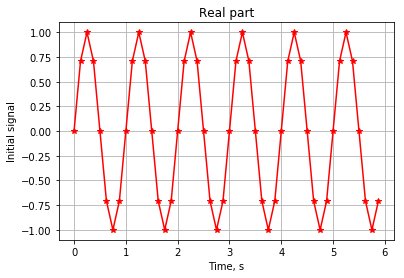

In [21]:
plt.plot(t,np.real(y),'r-*')
plt.title("Real part")
plt.xlabel('Time, s')
plt.ylabel('Initial signal')
plt.grid()

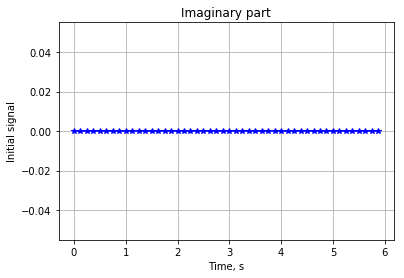

In [22]:
plt.plot(t,np.imag(y),'b-*')
plt.title("Imaginary part")
plt.xlabel('Time, s')
plt.ylabel('Initial signal')
plt.grid()

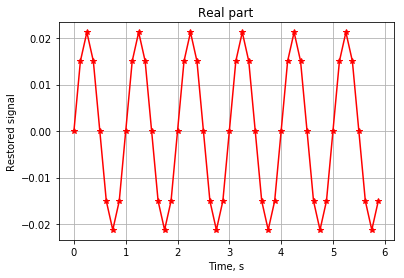

In [23]:
plt.plot(t,np.real(ys),'r-*')
plt.title("Real part")
plt.xlabel('Time, s')
plt.ylabel('Restored signal')
plt.grid()

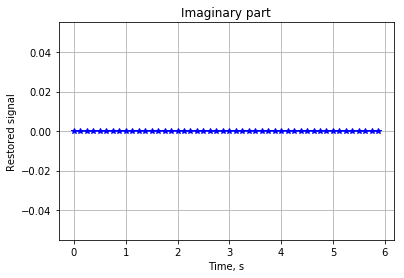

In [24]:
plt.plot(t,np.round(np.imag(ys), 5),'b-*')
plt.title("Imaginary part")
plt.xlabel('Time, s')
plt.ylabel('Restored signal')
plt.grid()